In [ ]:
sub setting
reorder
drop
rename
derived columns

filters
sorting
duplicate

In [ ]:
Steps for data analysis:
---------------------------------

1. data availability (import) : pd.read_XXXX
2. metadata inspection : dataframe.info()
3. data inspection : dataframe.describe()
    descriptive analysis
    What charts?
    
4. data cleaning/data wrangling/data prepration
    
    Structural changes:
        Subsetting [selecting specific colums]
        Reorder the columns
        rename the columns
        derived variable creation/creating new calculated columns
        drop the columns
        data type conversion
        
    Content based changes:
        filters
        handling the duplicates
        sorting
        data imputauion 
            missing value treatment : .dropna(axis = 0), .dropna(axis = 1), fillna()
                                    : .isna(), .isnull(), .notna(), .notnull()
            outlier treatment : .clip() .clip_upper() .clip_lower()
                                Series.quantile()
        groups/bins : pd.cut()
        divide the data in equal intervals basis no of records : pd.qcut()
        
        data aggregation/data summaries/grouping
            .groupby()    .agg() /.sum(), .mean(), .max()....
            .pivot() : from long to wide
            .melt() : from wide to long
            
            .pivot_table()
            
        Data combining
            appending
            hstack
            joins/merge
    
What charts?

Stats

Predictive Modelling
    
    Other steps:
        dummy variable creation
        feature engg.
        data transformation / normalization
    
    Regression: Stats, DT, EL (, KNN, ANN
    Classification: SVM, NB
    Time series forecating
    Segmentation/Clustering

In [1]:
import numpy as np
import pandas as pd

### missing values

In [ ]:
missing identification: isna(), isnull(), notna(), notnull()

drop the variable/column  : .dropna()
drop the rows : .dropna()
impute the missings : .fillna()
    categorical
        mode
        
    continuous
        mean
        median
    

In [5]:
stores = pd.read_csv('D:/SampleData/stores.csv')

In [51]:
stores.count()

StoreCode          32
StoreName          32
StoreType          32
Location           32
OperatingCost      32
Staff_Cnt          32
TotalSales         32
Total_Customers    32
AcqCostPercust     29
BasketSize         32
ProfitPercust      32
OwnStore           32
OnlinePresence     32
Tenure             32
StoreSegment       32
NewCol             32
Bins               32
Bins1              32
dtype: int64

In [9]:
# calculate how many missing values
1 - stores.count()/stores.shape[0]

StoreCode          0.00000
StoreName          0.00000
StoreType          0.00000
Location           0.00000
OperatingCost      0.00000
Staff_Cnt          0.00000
TotalSales         0.00000
Total_Customers    0.00000
AcqCostPercust     0.09375
BasketSize         0.00000
ProfitPercust      0.00000
OwnStore           0.00000
OnlinePresence     0.00000
Tenure             0.00000
StoreSegment       0.00000
dtype: float64

In [6]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 15 columns):
StoreCode          32 non-null object
StoreName          32 non-null object
StoreType          32 non-null object
Location           32 non-null object
OperatingCost      32 non-null float64
Staff_Cnt          32 non-null int64
TotalSales         32 non-null float64
Total_Customers    32 non-null int64
AcqCostPercust     29 non-null float64
BasketSize         32 non-null float64
ProfitPercust      32 non-null float64
OwnStore           32 non-null int64
OnlinePresence     32 non-null int64
Tenure             32 non-null int64
StoreSegment       32 non-null int64
dtypes: float64(5), int64(6), object(4)
memory usage: 3.8+ KB


In [14]:
stores.dropna(axis = 1).head(4)

,StoreCode,StoreName,StoreType,Location,OperatingCost,Staff_Cnt,TotalSales,Total_Customers,BasketSize,ProfitPercust,OwnStore,OnlinePresence,Tenure,StoreSegment
0,STR101,Electronics Zone,Electronincs,Delhi,21.0,60,160.0,110,2.620,16.46,0,1,4,4
1,STR102,Apparel Zone,Apparel,Delhi,21.0,60,160.0,110,2.875,17.02,0,1,4,4
2,STR103,Super Bazar,Super Market,Delhi,22.8,40,108.0,93,2.320,18.61,1,1,4,1
3,STR104,Super Market,Super Market,Delhi,21.4,60,258.0,110,3.215,19.44,1,0,3,1


In [23]:
stores.AcqCostPercust.fillna(stores.AcqCostPercust.median())

0     3.90
1     3.90
2     3.85
3     3.08
4     3.15
5     2.76
6     3.21
7     3.69
8     3.92
9     3.92
10    3.92
11    3.73
12    3.73
13    3.73
14    2.93
15    3.00
16    3.23
17    4.08
18    4.93
19    4.22
20    3.70
21    2.76
22    3.15
23    3.73
24    3.08
25    4.08
26    4.43
27    3.77
28    4.22
29    3.62
30    3.54
31    4.11
Name: AcqCostPercust, dtype: float64

In [25]:
stores.describe().T

,count,mean,std,min,25%,50%,75%,max
OperatingCost,32.0,20.090625,6.026948,10.400,15.42500,19.200,22.80,33.900
Staff_Cnt,32.0,61.875000,17.859216,40.000,40.00000,60.000,80.00,80.000
TotalSales,32.0,230.721875,123.938694,71.100,120.82500,196.300,326.00,472.000
Total_Customers,32.0,146.687500,68.562868,52.000,96.50000,123.000,180.00,335.000
AcqCostPercust,29.0,3.651034,0.532664,2.760,3.15000,3.730,3.92,4.930
BasketSize,32.0,3.217250,0.978457,1.513,2.58125,3.325,3.61,5.424
ProfitPercust,32.0,17.848750,1.786943,14.500,16.89250,17.710,18.90,22.900
OwnStore,32.0,0.437500,0.504016,0.000,0.00000,0.000,1.00,1.000
OnlinePresence,32.0,0.406250,0.498991,0.000,0.00000,0.000,1.00,1.000
Tenure,32.0,3.687500,0.737804,3.000,3.00000,4.000,4.00,5.000


In [31]:
stores.TotalSales.quantile(.99)

468.28000000000003

In [ ]:
.clip()

.clip_upper()
.clip_lower()

In [37]:
stores['NewCol'] = stores.TotalSales.clip(lower = stores.TotalSales.quantile(.01), 
                                          upper = stores.TotalSales.quantile(.99))

In [38]:
stores[['TotalSales', 'NewCol']]

,TotalSales,NewCol
0,160.0,160.000
1,160.0,160.000
2,108.0,108.000
3,258.0,258.000
4,360.0,360.000
5,225.0,225.000
6,360.0,360.000
7,146.7,146.700
8,140.8,140.800
9,167.6,167.600


In [ ]:
groups/bins: pd.cut()     and     pd.qcut()

continuous: 11 - 90
    
            11 - 19
            20 - 26
            27 - 45
            45 - 60
            > 60

continuous: 11 - 90
    
            11 - 20
            21 - 30
            31 - 40
            ..
            81 - 90

In [42]:
stores['Bins'] = pd.cut(stores.TotalSales, 4)

In [46]:
pd.cut(stores.TotalSales, range(0, 501, 50))

0     (150, 200]
1     (150, 200]
2     (100, 150]
3     (250, 300]
4     (350, 400]
5     (200, 250]
6     (350, 400]
7     (100, 150]
8     (100, 150]
9     (150, 200]
10    (150, 200]
11    (250, 300]
12    (250, 300]
13    (250, 300]
14    (450, 500]
15    (450, 500]
16    (400, 450]
17     (50, 100]
18     (50, 100]
19     (50, 100]
20    (100, 150]
21    (300, 350]
22    (300, 350]
23    (300, 350]
24    (350, 400]
25     (50, 100]
26    (100, 150]
27     (50, 100]
28    (350, 400]
29    (100, 150]
30    (300, 350]
31    (100, 150]
Name: TotalSales, dtype: category
Categories (10, interval[int64]): [(0, 50] < (50, 100] < (100, 150] < (150, 200] ... (300, 350] < (350, 400] < (400, 450] < (450, 500]]

In [44]:
stores['Bins1'] = pd.cut(stores.TotalSales, range(0, 501, 50))

In [45]:
stores[['TotalSales', 'Bins1']]

,TotalSales,Bins1
0,160.0,"(150, 200]"
1,160.0,"(150, 200]"
2,108.0,"(100, 150]"
3,258.0,"(250, 300]"
4,360.0,"(350, 400]"
5,225.0,"(200, 250]"
6,360.0,"(350, 400]"
7,146.7,"(100, 150]"
8,140.8,"(100, 150]"
9,167.6,"(150, 200]"


In [50]:
pd.cut(stores.TotalSales, [0, 10, 150, 350, 420, stores.TotalSales.max()], 
           labels=['G1', 'G2', 'G3', 'G4', 'G5'])

0     G3
1     G3
2     G2
3     G3
4     G4
5     G3
6     G4
7     G2
8     G2
9     G3
10    G3
11    G3
12    G3
13    G3
14    G5
15    G5
16    G5
17    G2
18    G2
19    G2
20    G2
21    G3
22    G3
23    G3
24    G4
25    G2
26    G2
27    G2
28    G4
29    G2
30    G3
31    G2
Name: TotalSales, dtype: category
Categories (5, object): [G1 < G2 < G3 < G4 < G5]

### summaries [group by]

In [ ]:
# get the total sales for each location

# get total and average Sales for each location

# get the total sales and total operating cost for each Location

# get the total and average sales and operating cost for each Location

# get the total sales and average operating cost for each Location

# get total sales for each Location and Store Type

In [53]:
stores.TotalSales.sum()

7383.099999999999

In [56]:
# get the total sales for each location
grp = stores.groupby('Location')

In [58]:
grp.TotalSales.sum()

Location
Chennai    2235.4
Delhi      1777.7
Kolkata    1612.4
Mumbai     1757.6
Name: TotalSales, dtype: float64

In [60]:
stores.groupby('Location')['TotalSales'].sum()

Location
Chennai    2235.4
Delhi      1777.7
Kolkata    1612.4
Mumbai     1757.6
Name: TotalSales, dtype: float64

In [61]:
type(grp)

pandas.core.groupby.generic.DataFrameGroupBy

In [69]:
# get total and average Sales for each location
stores.groupby('Location')['TotalSales'].agg(['sum', 'mean', 'max', 'min'])

,sum,mean,max,min
Location,,,,
Chennai,2235.4,279.4250,472.0,140.8
Delhi,1777.7,222.2125,360.0,108.0
Kolkata,1612.4,201.5500,400.0,79.0
Mumbai,1757.6,219.7000,440.0,71.1


In [67]:
stores.groupby('Location')['TotalSales'].sum()

Location
Chennai    2235.4
Delhi      1777.7
Kolkata    1612.4
Mumbai     1757.6
Name: TotalSales, dtype: float64

In [66]:
stores.groupby('Location')['TotalSales'].mean()

Location
Chennai    279.4250
Delhi      222.2125
Kolkata    201.5500
Mumbai     219.7000
Name: TotalSales, dtype: float64

In [72]:
# get the total sales and total operating cost for each Location
stores.groupby('Location')[['TotalSales', 'OperatingCost']].sum()

,TotalSales,OperatingCost
Location,,
Chennai,2235.4,129.5
Delhi,1777.7,161.7
Kolkata,1612.4,174.8
Mumbai,1757.6,176.9


In [85]:
# get the total and average sales and operating cost for each Location
stores.groupby('Location')[['TotalSales', 'OperatingCost']].agg(['sum', 'mean']).reset_index()


Location TotalSales           OperatingCost         
                  sum      mean           sum     mean
0  Chennai     2235.4  279.4250         129.5  16.1875
1    Delhi     1777.7  222.2125         161.7  20.2125
2  Kolkata     1612.4  201.5500         174.8  21.8500
3   Mumbai     1757.6  219.7000         176.9  22.1125

In [84]:
# get the total sales and average operating cost for each Location
stores.groupby('Location')[['TotalSales', 
                        'OperatingCost']].agg({'TotalSales': 'sum', 'OperatingCost': 'mean'}).reset_index()

,Location,TotalSales,OperatingCost
0,Chennai,2235.4,16.1875
1,Delhi,1777.7,20.2125
2,Kolkata,1612.4,21.8500
3,Mumbai,1757.6,22.1125


In [88]:
# get total sales for each Location and Store Type
df1 = stores.groupby(['Location', 'StoreType']).TotalSales.sum().reset_index()

In [91]:
df1.pivot('Location', 'StoreType', 'TotalSales')

StoreType,Apparel,Electronincs,Super Market
Location,,,
Chennai,915.4,600.8,719.2
Delhi,745.0,306.7,726.0
Kolkata,525.0,521.0,566.4
Mumbai,700.7,790.0,266.9


In [93]:
stores.pivot_table(index = 'Location', columns='StoreType', values='TotalSales', aggfunc='sum')

StoreType,Apparel,Electronincs,Super Market
Location,,,
Chennai,915.4,600.8,719.2
Delhi,745.0,306.7,726.0
Kolkata,525.0,521.0,566.4
Mumbai,700.7,790.0,266.9


In [99]:
stores.pivot_table(index = ['Location', 'StoreType'], values='TotalSales', aggfunc=['sum', 'mean'])

sum        mean
                      TotalSales  TotalSales
Location StoreType                          
Chennai  Apparel           915.4  305.133333
         Electronincs      600.8  300.400000
         Super Market      719.2  239.733333
Delhi    Apparel           745.0  248.333333
         Electronincs      306.7  153.350000
         Super Market      726.0  242.000000
Kolkata  Apparel           525.0  175.000000
         Electronincs      521.0  260.500000
         Super Market      566.4  188.800000
Mumbai   Apparel           700.7  233.566667
         Electronincs      790.0  395.000000
         Super Market      266.9   88.966667

In [97]:
stores

,StoreCode,StoreName,StoreType,Location,OperatingCost,Staff_Cnt,TotalSales,Total_Customers,AcqCostPercust,BasketSize,ProfitPercust,OwnStore,OnlinePresence,Tenure,StoreSegment,NewCol,Bins,Bins1
0,STR101,Electronics Zone,Electronincs,Delhi,21.0,60,160.0,110,3.90,2.620,16.46,0,1,4,4,160.000,"(70.699, 171.325]","(150, 200]"
1,STR102,Apparel Zone,Apparel,Delhi,21.0,60,160.0,110,3.90,2.875,17.02,0,1,4,4,160.000,"(70.699, 171.325]","(150, 200]"
2,STR103,Super Bazar,Super Market,Delhi,22.8,40,108.0,93,3.85,2.320,18.61,1,1,4,1,108.000,"(70.699, 171.325]","(100, 150]"
3,STR104,Super Market,Super Market,Delhi,21.4,60,258.0,110,3.08,3.215,19.44,1,0,3,1,258.000,"(171.325, 271.55]","(250, 300]"
4,STR105,Central Store,Super Market,Delhi,18.7,80,360.0,175,3.15,3.440,17.02,0,0,3,2,360.000,"(271.55, 371.775]","(350, 400]"
5,STR106,Apparel Zone,Apparel,Delhi,18.1,60,225.0,105,2.76,3.460,20.22,1,0,3,1,225.000,"(171.325, 271.55]","(200, 250]"
6,STR107,Fashion Bazar,Apparel,Delhi,14.3,80,360.0,245,3.21,3.570,15.84,0,0,3,4,360.000,"(271.55, 371.775]","(350, 400]"
7,STR108,Digital Bazar,Electronincs,Delhi,24.4,40,146.7,62,3.69,3.190,20.00,1,0,4,2,146.700,"(70.699, 171.325]","(100, 150]"
8,STR109,Electronics Zone,Electronincs,Chennai,22.8,40,140.8,95,3.92,3.150,22.90,1,0,4,2,140.800,"(70.699, 171.325]","(100, 150]"
9,STR110,Apparel Zone,Apparel,Chennai,19.2,60,167.6,123,3.92,3.440,18.30,1,0,4,4,167.600,"(70.699, 171.325]","(150, 200]"


In [ ]:
a.agg?

### EXL Classroom

In [2]:
# Selecting Columns
d = {'Chem' : pd.Series([30, 70, 35,25,26,67,77,67,89], index=["Raj",'Ram', 'Asa', 'Pi','Chi','Ru',"Sita","Ria","Gita"],dtype=int),
     'Math' : pd.Series([18, 26, 35, 40,55,89,79,100], index=["Raj",'Ram', 'Pi', 'Chi', 'Ru',"Sita","Ria","Gita"],dtype=int),
     'Phy' : pd.Series([31, 42, 83,34,80,78], index=["Asa",'Ram', 'Pi', 'Ru',"Sita","Gita"],dtype=int)}
exam = pd.DataFrame(d)
exam1=exam.copy() ## To make copy of your data
exam1

,Chem,Math,Phy
Asa,35,NaN,31.0
Chi,26,40.0,NaN
Gita,89,100.0,78.0
Pi,25,35.0,83.0
Raj,30,18.0,NaN
Ram,70,26.0,42.0
Ria,67,79.0,NaN
Ru,67,55.0,34.0
Sita,77,89.0,80.0


In [3]:
# Adding columns

print ("Adding a new column using the existing columns in DataFrame:")
exam1['Total']=exam1['Chem']+exam1['Math']+exam1['Phy']
exam1 

Adding a new column using the existing columns in DataFrame:


,Chem,Math,Phy,Total
Asa,35,NaN,31.0,NaN
Chi,26,40.0,NaN,NaN
Gita,89,100.0,78.0,267.0
Pi,25,35.0,83.0,143.0
Raj,30,18.0,NaN,NaN
Ram,70,26.0,42.0,138.0
Ria,67,79.0,NaN,NaN
Ru,67,55.0,34.0,156.0
Sita,77,89.0,80.0,246.0


In [4]:
#Dealing with missing data
exam.isnull().sum()

Chem    0
Math    1
Phy     3
dtype: int64

Calculations with Missing Data
When summing data, NA will be treated as Zero If the data are all NA, then the result will be NA Cleaning / Filling Missing Data

Pandas provides various methods for cleaning the missing values. The fillna function can “fill in” NA values with non-null data in a couple of ways, which we have illustrated in the following sections.

Replace NaN with a Scalar Value The following program shows how you can replace "NaN" with "0".

exam=exam.fillna(0)

In [5]:
exam=exam.fillna(0)
exam 

,Chem,Math,Phy
Asa,35,0.0,31.0
Chi,26,40.0,0.0
Gita,89,100.0,78.0
Pi,25,35.0,83.0
Raj,30,18.0,0.0
Ram,70,26.0,42.0
Ria,67,79.0,0.0
Ru,67,55.0,34.0
Sita,77,89.0,80.0


In [6]:
exam["T"]=exam["Math"]+exam["Phy"]+exam["Chem"]
exam

,Chem,Math,Phy,T
Asa,35,0.0,31.0,66.0
Chi,26,40.0,0.0,66.0
Gita,89,100.0,78.0,267.0
Pi,25,35.0,83.0,143.0
Raj,30,18.0,0.0,48.0
Ram,70,26.0,42.0,138.0
Ria,67,79.0,0.0,146.0
Ru,67,55.0,34.0,156.0
Sita,77,89.0,80.0,246.0


In [7]:
exam1

,Chem,Math,Phy,Total
Asa,35,NaN,31.0,NaN
Chi,26,40.0,NaN,NaN
Gita,89,100.0,78.0,267.0
Pi,25,35.0,83.0,143.0
Raj,30,18.0,NaN,NaN
Ram,70,26.0,42.0,138.0
Ria,67,79.0,NaN,NaN
Ru,67,55.0,34.0,156.0
Sita,77,89.0,80.0,246.0


In [8]:
a=exam1["Math"].median()
exam1["Math"]= exam1["Math"].fillna(a)
exam1 
b=exam1["Phy"].median()
exam1["Phy"]= exam1["Phy"].fillna(b)
exam1["T"]=exam1["Math"]+exam1["Phy"]+exam1["Chem"]
exam1

,Chem,Math,Phy,Total,T
Asa,35,47.5,31.0,NaN,113.5
Chi,26,40.0,60.0,NaN,126.0
Gita,89,100.0,78.0,267.0,267.0
Pi,25,35.0,83.0,143.0,143.0
Raj,30,18.0,60.0,NaN,108.0
Ram,70,26.0,42.0,138.0,138.0
Ria,67,79.0,60.0,NaN,206.0
Ru,67,55.0,34.0,156.0,156.0
Sita,77,89.0,80.0,246.0,246.0


In [9]:
#Dropping missing values using "dropna()"
exam
exam=exam.dropna()
#exam_1
## dataframe copy
## exam2=exam.copy()
exam
##drop exam["Phy"]

,Chem,Math,Phy,T
Asa,35,0.0,31.0,66.0
Chi,26,40.0,0.0,66.0
Gita,89,100.0,78.0,267.0
Pi,25,35.0,83.0,143.0
Raj,30,18.0,0.0,48.0
Ram,70,26.0,42.0,138.0
Ria,67,79.0,0.0,146.0
Ru,67,55.0,34.0,156.0
Sita,77,89.0,80.0,246.0


In [10]:
#Replacing missing values by generic values by replace function¶
df = pd.DataFrame({'one':[10,20,30,40,50,"ABC"], 'AGE':[-19,1,30,40,50,60]})

df=df.replace({"ABC":60,-19:19})
df 

,one,AGE
0,10,19
1,20,1
2,30,30
3,40,40
4,50,50
5,60,60


In [11]:
details = {'Brand':pd.Series(['Nokia','Asus',"Nokia","Nokia",'Samsung',"ABC",'Micromax','Apple','MI','Zen',"Apple"]),
   'Avg.Price':pd.Series([10000,8000,12500,7000,40000,12000,12999,13999,59999]),
   'Rating(10)':pd.Series([7,6.5,8.5,9,8,9.5,7,9])
}

d = pd.DataFrame(details)
d

,Brand,Avg.Price,Rating(10)
0,Nokia,10000.0,7.0
1,Asus,8000.0,6.5
2,Nokia,12500.0,8.5
3,Nokia,7000.0,9.0
4,Samsung,40000.0,8.0
5,ABC,12000.0,9.5
6,Micromax,12999.0,7.0
7,Apple,13999.0,9.0
8,MI,59999.0,NaN
9,Zen,NaN,NaN


In [12]:
df2 = d.sort_values(by=['Rating(10)'],ascending= False)#Decending order
df2

,Brand,Avg.Price,Rating(10)
5,ABC,12000.0,9.5
3,Nokia,7000.0,9.0
7,Apple,13999.0,9.0
2,Nokia,12500.0,8.5
4,Samsung,40000.0,8.0
0,Nokia,10000.0,7.0
6,Micromax,12999.0,7.0
1,Asus,8000.0,6.5
8,MI,59999.0,NaN
9,Zen,NaN,NaN


In [13]:
s = pd.Series(['Orange', 'Pink', 'Blue'])
s1=s.str.get_dummies()
s1 

,Blue,Orange,Pink
0,0,1,0
1,0,0,1
2,1,0,0


In [14]:
d

,Brand,Avg.Price,Rating(10)
0,Nokia,10000.0,7.0
1,Asus,8000.0,6.5
2,Nokia,12500.0,8.5
3,Nokia,7000.0,9.0
4,Samsung,40000.0,8.0
5,ABC,12000.0,9.5
6,Micromax,12999.0,7.0
7,Apple,13999.0,9.0
8,MI,59999.0,NaN
9,Zen,NaN,NaN


In [15]:
pd.get_dummies(d.Brand)

,ABC,Apple,Asus,MI,Micromax,Nokia,Samsung,Zen
0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0
5,1,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0
7,0,1,0,0,0,0,0,0
8,0,0,0,1,0,0,0,0
9,0,0,0,0,0,0,0,1


### Correlation
Correlation shows the linear relationship between any two array of values (series). There are multiple methods to compute the correlation like pearson(default), spearman and kendall.

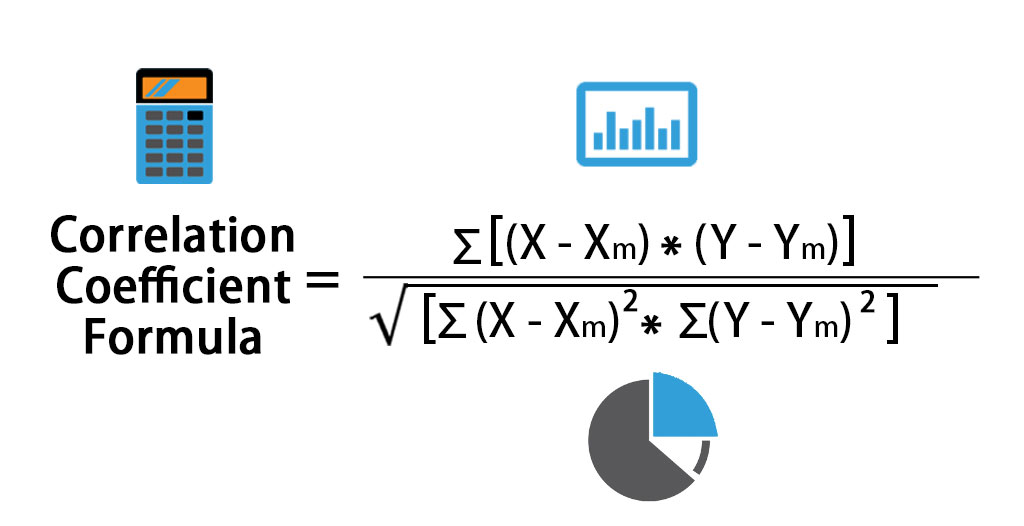
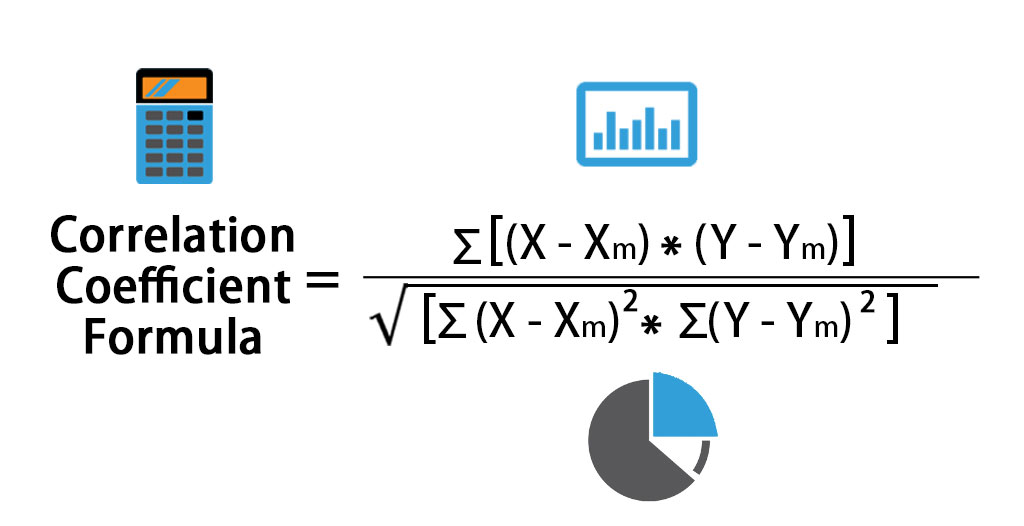

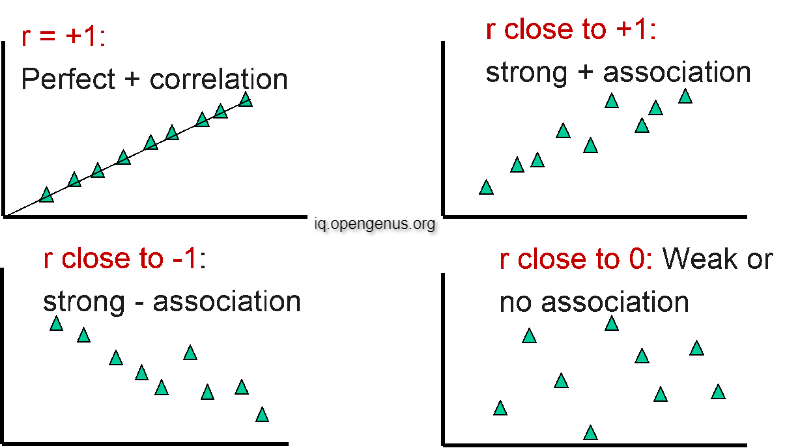

In [20]:
details = {'Brand':pd.Series(['Nokia','Asus',"Nokia","Nokia",'Samsung',"ABC",'Micromax','Apple','MI','Zen',"Apple"]),
   'Avg.Price':pd.Series([10000,8000,12500,7000,40000,12000,12999,13999,59999,7899]),
   'Rating(10)':pd.Series([7,6.5,8.5,9,8,9.5,7,9,10])
}

d = pd.DataFrame(details)
d

,Brand,Avg.Price,Rating(10)
0,Nokia,10000.0,7.0
1,Asus,8000.0,6.5
2,Nokia,12500.0,8.5
3,Nokia,7000.0,9.0
4,Samsung,40000.0,8.0
5,ABC,12000.0,9.5
6,Micromax,12999.0,7.0
7,Apple,13999.0,9.0
8,MI,59999.0,10.0
9,Zen,7899.0,NaN


In [22]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
#import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
#import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
#sns.set()
from subprocess import check_output
d.corr()


,Avg.Price,Rating(10)
Avg.Price,1.000000,0.457285
Rating(10),0.457285,1.000000


### Mergeing/Joining 

In [ ]:
# joins/merge << pd.merge() >>
demographic = pd.read_csv('D:/SampleData/Demographic_Data.csv')
transaction = pd.read_csv('D:/SampleData/Transaction_Summary.csv')

In [ ]:
# Get the details of registered patients and date of their visits?
# Get the list of patients who have not yet registered with us?
# Get the list of registered patients who have never make a visit?

In [ ]:
# append the data << df1.append(df2) >>
Q1 = pd.read_csv('D:/SampleData/POS_Q1.csv')
Q2 = pd.read_csv('D:/SampleData/POS_Q2.csv')
Q3 = pd.read_csv('D:/SampleData/POS_Q3.csv')
Q4 = pd.read_csv('D:/SampleData/POS_Q4.csv')